In [119]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Datos del dataset

- *Gender*: Género del solicitante del préstamo (ej., "Male" o "Female").
- *Married*: Estado civil del solicitante, indica si está casado (ej., "Yes" o "No").
- *Dependents*: Número de personas dependientes económicamente del solicitante (ej., 0, 1, 2, "3+" para tres o más).
- *Education*: Nivel educativo del solicitante (ej., "Graduate" o "Not Graduate").
- *Self_Employed*: Indica si el solicitante trabaja de manera independiente (ej., "Yes" o "No").
- *ApplicantIncome*: Ingreso mensual o anual del solicitante en unidades monetarias.
- *CoapplicantIncome*: Ingreso mensual o anual del co-solicitante (si aplica), en unidades monetarias.
- *LoanAmount*: Monto del préstamo solicitado en unidades monetarias.
- *Loan_Amount_Term*: Plazo del préstamo solicitado en meses.
- *Credit_History*: Historial de crédito del solicitante, indica si tiene un buen historial crediticio (valor binario, típicamente 1 para buen historial y 0 para historial problemático).
- *Property_Area*: Ubicación de la propiedad para la que se solicita el préstamo (ej., "Urban", "Rural" o "Semiurban").

- *loan_status*: Variable de salida (objetivo), indica si el préstamo fue aprobado o rechazado.

In [120]:
df = pd.read_csv('./loan_status.csv')
df. head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Eliminar la variable ID

In [122]:
df.drop(['Loan_ID'], axis=1, inplace=True)

#### Eliminar las varibles con nan

In [123]:
len(df)

614

In [124]:
~df.isna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,True,True,True,True,True,True,True,False,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
609,True,True,True,True,True,True,True,True,True,True,True,True
610,True,True,True,True,True,True,True,True,True,True,True,True
611,True,True,True,True,True,True,True,True,True,True,True,True
612,True,True,True,True,True,True,True,True,True,True,True,True


In [125]:
len(df[df.isna() == True])

614

In [126]:
df_2 =df.dropna()

In [127]:
len(df_2)

480

### One encoding

In [128]:
df_2 = pd.get_dummies(df_2, dtype=np.int64, drop_first=True)

### Entrenamiento del modelo 

#### Train Test Split

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
df_2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [134]:
X = df_2.drop(['Loan_Status_Y'], axis=1)
Y = df_2['Loan_Status_Y']

In [139]:
x_train, x_test, y_train, y_test =train_test_split(X,Y,test_size=0.2,random_state=123)

In [140]:
x_train.shape

(384, 14)

In [141]:
x_test.shape

(96, 14)

### Entrenamiento del modelo

In [142]:
from sklearn.linear_model import LogisticRegression

In [144]:
model = LogisticRegression()

In [145]:
model.fit(x_train,y_train)

C:\Users\mateo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [149]:
y_pred =model.predict(x_test)

In [151]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, ConfusionMatrixDisplay

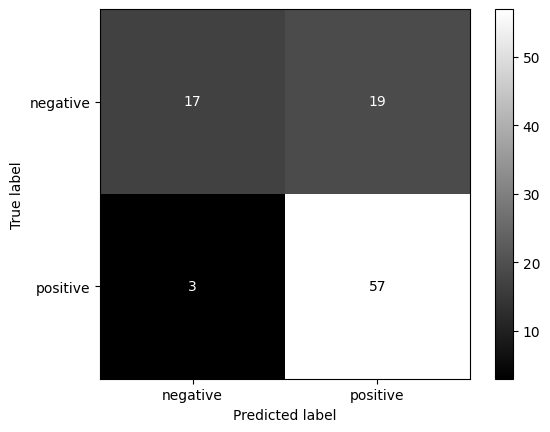

In [154]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['negative', 'positive'])
disp.plot(cmap='grey')

In [155]:
recall_score(y_test,y_pred)

0.95

In [156]:
accuracy_score(y_test,y_pred)

0.7708333333333334

In [157]:
f1_score(y_test,y_pred)

0.8382352941176471